## Regression CNN - Facial Keypoints

This is an example to show how to create custom datasets and do regression with images. Our task is to find the facial keypoints in a face. The data comes from the [Facial Keypoint Dataset - Kaggle](https://www.kaggle.com/c/facial-keypoints-detection), thanks to Yoshsio Bengio.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Getting and converting the data

In [3]:
path1 =Path('../data/facial_keypoints')

In [4]:
raw_data = pd.read_csv(path1/'training.csv')

In [8]:
raw_data.shape

(7049, 31)

In [9]:
raw_data.head(4)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...


In [10]:
raw_data.describe()
# shows data imbalance

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [5]:
#cleaning the data
df = raw_data.dropna()

In [8]:
df.count()
# just uding 1/4 of the dataset.

left_eye_center_x            2140
left_eye_center_y            2140
right_eye_center_x           2140
right_eye_center_y           2140
left_eye_inner_corner_x      2140
left_eye_inner_corner_y      2140
left_eye_outer_corner_x      2140
left_eye_outer_corner_y      2140
right_eye_inner_corner_x     2140
right_eye_inner_corner_y     2140
right_eye_outer_corner_x     2140
right_eye_outer_corner_y     2140
left_eyebrow_inner_end_x     2140
left_eyebrow_inner_end_y     2140
left_eyebrow_outer_end_x     2140
left_eyebrow_outer_end_y     2140
right_eyebrow_inner_end_x    2140
right_eyebrow_inner_end_y    2140
right_eyebrow_outer_end_x    2140
right_eyebrow_outer_end_y    2140
nose_tip_x                   2140
nose_tip_y                   2140
mouth_left_corner_x          2140
mouth_left_corner_y          2140
mouth_right_corner_x         2140
mouth_right_corner_y         2140
mouth_center_top_lip_x       2140
mouth_center_top_lip_y       2140
mouth_center_bottom_lip_x    2140
mouth_center_b

In [10]:
# into numpy arrays
# df['image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

/home/nbuser/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [146]:
# df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [116]:
# numpy_images_all = np.vstack(raw_data['image'].values)

In [117]:
# numpy_images_all = numpy_images_all.astype(np.int)

In [118]:
# numpy_images_all = numpy_images_all.reshape(-1,1,96,96)

In [119]:
# numpy_images_all.shape

(7049, 1, 96, 96)

In [120]:
# for i in range(len(numpy_images_all)):
#     scipy.misc.imsave('data/facial_keypoint_pure/train_all/img_%d.jpg' % i, numpy_images_all[i][0])

/home/nbuser/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [121]:
# pdf = raw_data.drop(['Image','image'], 1)

In [122]:
# pdf.to_csv('data/facial_keypoint_pure/train_all.csv')

In [6]:
cords = df[df.columns[:-1]].values
cords = tensor(cords)

In [7]:
b = cords[0].reshape((-1,2)).flip(1); b

tensor([[39.0023, 66.0336],
        [36.4217, 30.2270],
        [39.6474, 59.5821],
        [39.9700, 73.1303],
        [37.3894, 36.3566],
        [37.3894, 23.4529],
        [29.0336, 56.9533],
        [32.2281, 80.2271],
        [29.0023, 40.2276],
        [29.6475, 16.3564],
        [57.0668, 44.4206],
        [79.9702, 61.1953],
        [77.3890, 28.6145],
        [72.9355, 43.3126],
        [84.4858, 43.1307]], dtype=torch.float64)

In [8]:
path = Path('data/facial_keypoint_pure/train')

In [9]:
test_folder = Path('data/facial_keypoint_pure/test')

In [10]:
fname = path/'img_0.jpg'

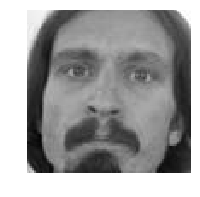

In [11]:
img = open_image(fname)
img.show()

In [12]:
img.size

torch.Size([96, 96])

In [13]:
f'{str(fname)[36:][:-4]}'

'0'

In [14]:
def get_coords(f):
    idx = int(f'{str(fname)[36:][:-4]}')
    return cords[idx].reshape((-1,2)).flip(1)

def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

In [15]:
cords = cords.type(torch.float32)

In [16]:
# needs to be float32
b = b.type(torch.float32)

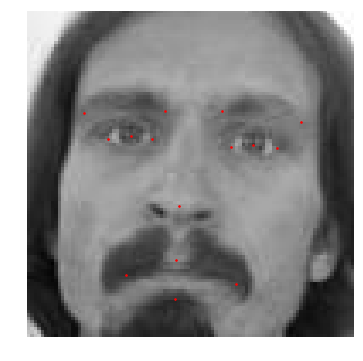

In [17]:
img.show(y=get_ip(img,b), figsize=(6, 6), cmap='gray')

## Creating a dataset

In [18]:
tfms = get_transforms(max_rotate=2, max_warp=0, max_lighting=0, max_zoom=1)

In [19]:
np.random.seed(42)
data = (ImageFileList.from_folder(path)
        .label_from_func(get_coords)
        .random_split_by_pct(0.2)
        .datasets(PointsDataset)
        .transform(tfms, tfms_y=True, size=(96,96))
        .databunch().normalize(imagenet_stats))

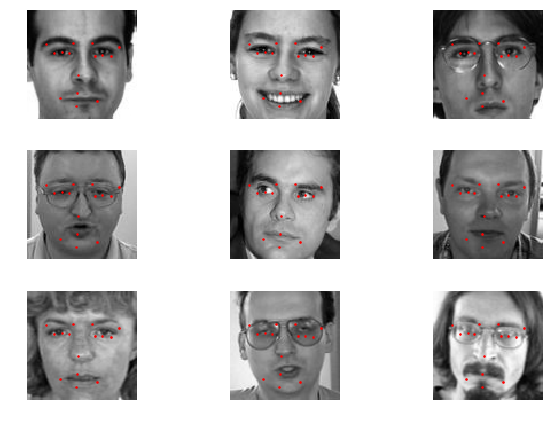

In [20]:
data.show_batch(3, figsize=(9,6))

In [21]:
# class RegressionDataset(ImageDatasetBase):
#     def __init__(self, fns:Collection[Path], pts:Collection[Tensor]):
#         super().__init__(c=2, x=fns, y=pts, task_type=TaskType.Regression)

In [22]:
# data = (ImageFileList
#         .from_folder(path)
#         .label_from_func(get_ctr)
#         .split_by_folder('train')
#         .datasets(RegressionDataset)
#         .transform(get_transforms(), tfm_y=True, size=64)
#         .databunch()
#         .normalize(imagenet_stats))

In [23]:
len(data.train_ds), len(data.valid_ds)

(1712, 428)

In [24]:
x, y = data.train_dl.one_batch()

In [25]:
x.shape

torch.Size([64, 3, 96, 96])

In [26]:
y.shape

torch.Size([64, 15, 2])

In [27]:
#15 facial points.
y[0]

tensor([[-0.1875,  0.3757],
        [-0.2412, -0.3703],
        [-0.1740,  0.2413],
        [-0.1673,  0.5235],
        [-0.2211, -0.2426],
        [-0.2211, -0.5114],
        [-0.3951,  0.1865],
        [-0.3286,  0.6714],
        [-0.3958, -0.1619],
        [-0.3823, -0.6592],
        [ 0.1889, -0.0746],
        [ 0.6660,  0.2749],
        [ 0.6123, -0.4039],
        [ 0.5195, -0.0977],
        [ 0.7601, -0.1014]], device='cuda:0')

## Train model

In [28]:
class RMSELossFlat(nn.MSELoss):
    "Same as `nn.MSELoss`, but flattens input and target."
    def forward(self, input:Tensor, target:Tensor) -> Rank0Tensor:
        return torch.sqrt(super().forward(input.view(-1), target.view(-1)))

In [29]:
learn = create_cnn(data, models.resnet34)
learn.loss_func = RMSELossFlat()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


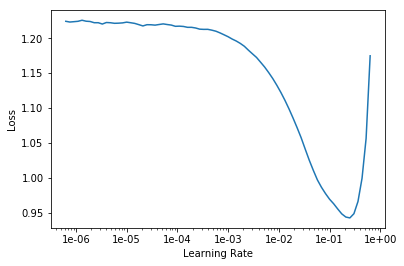

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
lr = 2e-2

In [32]:
learn.fit_one_cycle(8, slice(lr))

Total time: 00:38
epoch  train_loss  valid_loss
1      0.855159    0.549349    (00:05)
2      0.488957    0.196099    (00:04)
3      0.314108    0.055854    (00:04)
4      0.192324    0.023957    (00:04)
5      0.116078    0.012469    (00:04)
6      0.071150    0.004143    (00:04)
7      0.044230    0.002539    (00:04)
8      0.028335    0.001667    (00:04)



In [67]:
learn.save('stage-1-wd')

#### Thanks to @jerbly, for the code below. [His notebook](https://gist.github.com/jerbly/08fdd00013454a021451bfedbd54ada7)

In [34]:
preds = learn.pred_batch(DatasetType.Valid); preds[0]

tensor([-0.1861,  0.3768, -0.2410, -0.3657, -0.1735,  0.2416, -0.1659,  0.5179,
        -0.2176, -0.2442, -0.2218, -0.5110, -0.3936,  0.1896, -0.3301,  0.6698,
        -0.3943, -0.1627, -0.3805, -0.6549,  0.1901, -0.0743,  0.6639,  0.2771,
         0.6094, -0.4014,  0.5164, -0.0981,  0.7545, -0.1012])

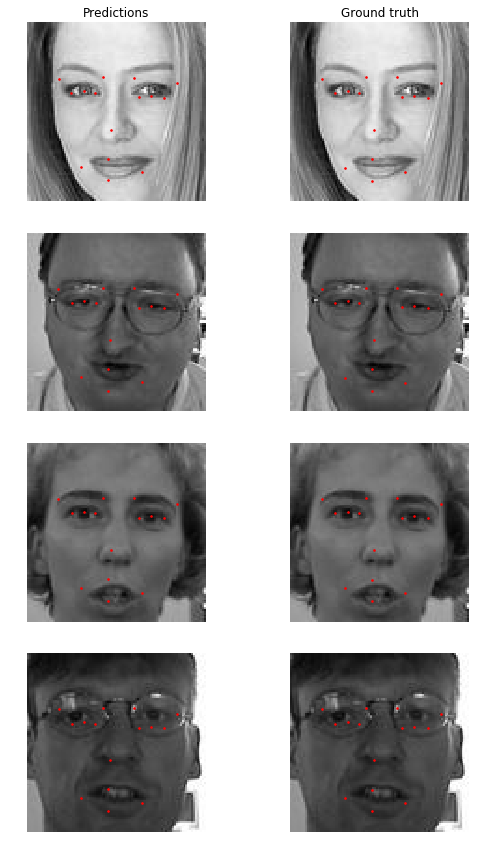

In [38]:
rows=4; figsize=None; ds_type=DatasetType.Valid

dl = learn.dl(ds_type)
figsize = ifnone(figsize, (8,3*rows))
_,axs = plt.subplots(rows, 2, figsize=figsize)
axs[0,0].set_title('Predictions')
axs[0,1].set_title('Ground truth')
for i in range(rows):
    x,y = dl.dataset[i]
    x.show(ax=axs[i,1], y=y) #Doing that first will update x before we pass it to reconstruct_output
    pred = ImagePoints(FlowField(x.size, preds[i].reshape((-1,2))), scale=False)
    x.show(ax=axs[i,0], y=pred)
plt.tight_layout()

In [45]:
doc(ImageFileList)